In [14]:
!pip install openai pandas transformers matplotlib python-dotenv


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [2]:
import pandas as pd

cppf = pd.read_json('data/cpp.jsonl', lines=True)
df = pd.concat([cppf], ignore_index=True)
df.sample(5)

,document,chapter,section,link,contents
72,Google C++ Style Guide,Naming,Enumerator Names,https://google.github.io/styleguide/cppguide.h...,Enumerators (for both scoped and unscoped enum...
69,Google C++ Style Guide,Naming,Constant Names,https://google.github.io/styleguide/cppguide.h...,"Variables declared constexpr or const, and who..."
37,Google C++ Style Guide,Other C++ Features,Rvalue References,https://google.github.io/styleguide/cppguide.h...,Use rvalue references only in certain special ...
84,Google C++ Style Guide,Formatting,,https://google.github.io/styleguide/cppguide.h...,Coding style and formatting are pretty arbitra...
40,Google C++ Style Guide,Other C++ Features,,https://google.github.io/styleguide/cppguide.h...,Specify noexcept when it is useful and correct...


In [3]:
df.chapter.value_counts()

chapter
Other C++ Features         27
Formatting                 20
Naming                     11
Classes                    10
Comments                    9
Header Files                7
Scoping                     7
Functions                   6
Google-Specific Magic       3
Exceptions to the Rules     3
Background                  2
C++ Version                 1
Inclusive Language          1
Name: count, dtype: int64

Token indices sequence length is longer than the specified maximum sequence length for this model (1213 > 1024). Running this sequence through the model will result in indexing errors
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


<Axes: >

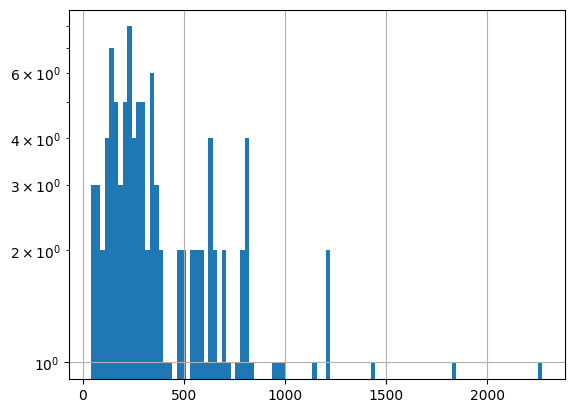

In [6]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ', regex=False)
    serie = serie.str.replace('\\n', ' ', regex=False)
    serie = serie.str.replace('  ',' ', regex=False)
    serie = serie.str.replace('  ',' ', regex=False)
    return serie


from transformers import GPT2TokenizerFast

df['text'] = "Styleguide: " + df.document + " - " + df.chapter + "; Section: " + df.section + " (link " + df.link + "); Guide: " + df.contents
df['text'] = remove_newlines(df.text)
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

df.n_tokens.hist(bins=100, log=True)

<Axes: >

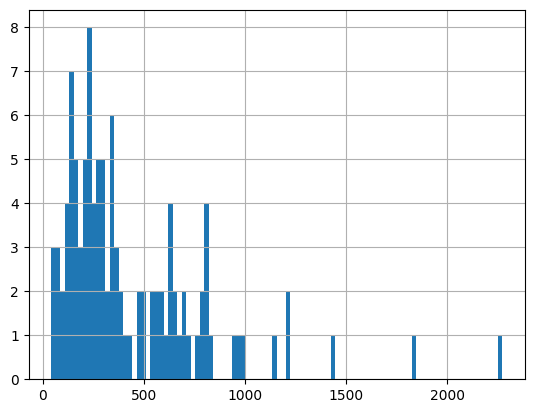

In [7]:
df.n_tokens.hist(bins=100)


In [8]:
df = df[df.n_tokens < 2000]

In [20]:
from openai import OpenAI
import dotenv

dotenv.load_dotenv('.env', override=True)

client = OpenAI()

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

df['embeddings'] = df.text.apply(lambda x: get_embedding(x))
df.to_parquet('data/ada_002_embeddings.parquet')
df.head()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
